## MVA 2019-20

To download this notebook or its pdf version:

http://geometrica.saclay.inria.fr/team/Fred.Chazal/MVA2019.html

Documentation for the latest version of Gudhi: 

http://gudhi.gforge.inria.fr/python/latest/

The goal of this first TP is to get you familiar with the basic data structures in GUDHI to  build and manipulate simplicial complexes and filtrations. 

# Simplicial complexes and simplex trees

In Gudhi, (filtered) simplicial complexes are encoded through a data structure called simplex tree. Here is a very simple example illustrating the use of simplex tree to represent simplicial complexes. See the Gudhi documentation for a complete list of functionalities. Try the following code and a few other functionalities from the documentation to get used to the Simplex Tree data structure.

In [1]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
st = gd.SimplexTree() # Create an empty simplicial complex

# Simplicies can be inserted 1 by 1
# Vertices are indexed by integers
if st.insert([0,1]):
    print("First simplex inserted!")
st.insert([1,2])
st.insert([2,3])
st.insert([3,0])
st.insert([0,2])
st.insert([3,1])

First simplex inserted!


True

In [3]:
L = st.get_filtration() # Get a list with all simplices
# Notice that inserting an edge automatically inserts its vertices, if they were not already in the complex
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)


In [4]:
# Insert the 2-skeleton, giving some filtration values to the faces
st.insert([0,1,2],filtration=0.1)
st.insert([1,2,3],filtration=0.2)
st.insert([0,2,3],filtration=0.3)
st.insert([0,1,3],filtration=0.4)

# If you add a new simplex with a given filtration value, all its faces that 
# were not in the complex are inserted with the same filtration value
st.insert([2,3,4],filtration=0.7)
st.get_filtration()

[([0], 0.0),
 ([1], 0.0),
 ([0, 1], 0.0),
 ([2], 0.0),
 ([0, 2], 0.0),
 ([1, 2], 0.0),
 ([3], 0.0),
 ([0, 3], 0.0),
 ([1, 3], 0.0),
 ([2, 3], 0.0),
 ([0, 1, 2], 0.1),
 ([1, 2, 3], 0.2),
 ([0, 2, 3], 0.3),
 ([0, 1, 3], 0.4),
 ([4], 0.7),
 ([2, 4], 0.7),
 ([3, 4], 0.7),
 ([2, 3, 4], 0.7)]

In [5]:
# Many operations can be done on simplicial complexes, see also the Gudhi documentation and examples
print("dimension=",st.dimension())
print("filtration[1,2]=",st.filtration([1,2]))
print("filtration[4,2]=",st.filtration([4,2]))
print("num_simplices=", st.num_simplices())
print("num_vertices=", st.num_vertices())
print("skeleton[2]=", st.get_skeleton(2))
print("skeleton[1]=", st.get_skeleton(1))
print("skeleton[0]=", st.get_skeleton(0))

dimension= 2
filtration[1,2]= 0.0
filtration[4,2]= 0.7
num_simplices= 18
num_vertices= 5
skeleton[2]= [([0, 1, 2], 0.1), ([0, 1, 3], 0.4), ([0, 1], 0.0), ([0, 2, 3], 0.3), ([0, 2], 0.0), ([0, 3], 0.0), ([0], 0.0), ([1, 2, 3], 0.2), ([1, 2], 0.0), ([1, 3], 0.0), ([1], 0.0), ([2, 3, 4], 0.7), ([2, 3], 0.0), ([2, 4], 0.7), ([2], 0.0), ([3, 4], 0.7), ([3], 0.0), ([4], 0.7)]
skeleton[1]= [([0, 1], 0.0), ([0, 2], 0.0), ([0, 3], 0.0), ([0], 0.0), ([1, 2], 0.0), ([1, 3], 0.0), ([1], 0.0), ([2, 3], 0.0), ([2, 4], 0.7), ([2], 0.0), ([3, 4], 0.7), ([3], 0.0), ([4], 0.7)]
skeleton[0]= [([0], 0.0), ([1], 0.0), ([2], 0.0), ([3], 0.0), ([4], 0.7)]


## Exercise 1. 
Make a few experiments with the simplex tree functions ( https://gudhi.inria.fr/python/latest/simplex_tree_ref.html ), e.g. changing the filtrations values, trying to assign values to simplices that do not lead to a filtration,... And observe the effects on the filtration. 

In [6]:
st_bad = gd.SimplexTree()
st_bad.insert([0], 1.0)
st_bad.insert([0, 1], 0.0)
st_bad.insert([1], 1.0)
print(st_bad.get_filtration())

[([0], 0.0), ([1], 0.0), ([0, 1], 0.0)]


# Filtrations and Betti numbers computation

In [7]:
# As an example, we assign to each simplex its dimension as filtration value
for splx in st.get_filtration():
    st.assign_filtration(splx[0],len(splx[0])-1)
# Let the structure know that we have messed with it and an old filtration cache may be invalid.
# This is redundant here because get_filtration() does it anyway, but not all functions do.
st.initialize_filtration()
st.get_filtration()

[([0], 0.0),
 ([1], 0.0),
 ([2], 0.0),
 ([3], 0.0),
 ([4], 0.0),
 ([0, 1], 1.0),
 ([0, 2], 1.0),
 ([1, 2], 1.0),
 ([0, 3], 1.0),
 ([1, 3], 1.0),
 ([2, 3], 1.0),
 ([2, 4], 1.0),
 ([3, 4], 1.0),
 ([0, 1, 2], 2.0),
 ([0, 1, 3], 2.0),
 ([0, 2, 3], 2.0),
 ([1, 2, 3], 2.0),
 ([2, 3, 4], 2.0)]

Before computing Betti numbers, we need to compute persistence of the filtration. 
For the moment, we consider the instruction below as a preprocessing step. 
However, have a look at the variable diag and try to guess, from the filtration, what it represent.  

In [8]:
# To compute the persistence diagram of the filtered complex
# By default it stops at dimension-1, use persistence_dim_max=True
# to compute homology in all dimensions
## Here, for the moment, we use it as a preprocessing step to compute Betti numbers. 
diag = st.persistence(persistence_dim_max=True)
# Display each interval as (dimension, (birth, death))
print(diag)

[(2, (2.0, inf)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


In [9]:
print(st.betti_numbers())

[1, 0, 1]


## Exercise 2. 
Define another filtration of the simplicial complex and check that the choice of the filtration does not change the betti numbers.

In [10]:
# As an example, we assign to each simplex its dimension as filtration value
for splx in st.get_filtration():
    st.assign_filtration(splx[0], round(rd.random(), 4))
st.make_filtration_non_decreasing()

diag = st.persistence(persistence_dim_max=True)
print(diag)
print(st.betti_numbers())

[(2, (0.9926, inf)), (1, (0.5916, 0.9773)), (1, (0.5709, 0.6482)), (1, (0.6707, 0.6983)), (0, (0.1979, inf)), (0, (0.5916, 0.9773)), (0, (0.4227, 0.6015)), (0, (0.6707, 0.6983))]
[1, 0, 1]


## Exercise 3. 
1. Recall the torus is homeomorphic to the surface obtained by identifying the opposite sides of a square as illustrated below. ![Figure 1](TorusTriangle.PNG) Using Gudhi, construct a triangulation (2-dimensional simplicial complex) of the Torus. Define a filtration on it, compute its persistence and use it to deduce the Betti numbers of the torus (check that you get the correct result using the function betti_numbers()).
2. Use Gudhi to compute the Betti numbers of a sphere of dimension 2 and of a sphere of dimension 3 (hint: the k -dimensional sphere is homeomorphic to the boundary of a (k+1)-dimensional simplex.

In [11]:
torus = gd.SimplexTree()
for i in range(3):
    for j in range(3):
        i2, j2 = (i+1)%3, (j+1)%3
        a, b, c, d = j+3*i, j2+3*i, j+3*i2, j2+3*i2
        torus.insert([a, b, d])
        torus.insert([a, d, c])
diagTorus = torus.persistence(persistence_dim_max=True)
bettiTorus = torus.betti_numbers()
print("Torrus :", bettiTorus)

Torrus : [1, 2, 1]


In [12]:
def sphere(k):
    s = gd.SimplexTree()
    for i in range(k+2):
        s.insert([j for j in range(k+2) if j != i])
    return s

for k in [2, 3]:
    s = sphere(k)
    diag = s.persistence(persistence_dim_max=True)
    bet = s.betti_numbers()
    print(f'{k}-sphere :', bet)

2-sphere : [1, 0, 1]
3-sphere : [1, 0, 0, 1]


# Vietoris-Rips and alpha-complex filtrations

For the definition of Vietoris-Rips complexes, see the slides of the courses (slide 65) : https://geometrica.saclay.inria.fr/team/Fred.Chazal/slides/Persistence2019.pdf

The definition of α-complex filtrations will be given during the TP and/or see the following book, p.137
https://hal.inria.fr/hal-01615863v2/document
Take care that in GUDHI the α-complex filtration is indexed by the square of the radius of the smallest empty circumscribing ball. 

These are basic instructions to build Vietoris-Rips and α-complex filtrations (and compute their persistent homology).

In [13]:
#Create a random point cloud in 3D
nb_pts=100
pt_cloud = np.random.rand(nb_pts,3)

Number of simplices in the V-R complex:  29497
Deprecated parameter. It has been replaced by max_intervals


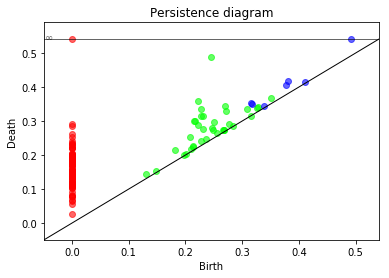

In [14]:
#Build Rips-Vietoris filtration and compute its persistence diagram
rips_complex = gd.RipsComplex(pt_cloud, max_edge_length=0.5)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
print("Number of simplices in the V-R complex: ",simplex_tree.num_simplices())
diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag).show()

Deprecated parameter. It has been replaced by max_intervals


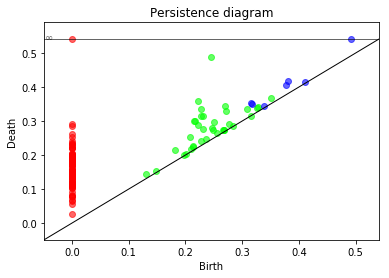

In [15]:
#Compute Rips-Vietoris filtration and compute its persistence diagram from
#a pairwise distance matrix
dist_mat = []
for i in range(nb_pts):
    ld = []
    for j in range(i):
        ld.append(np.linalg.norm(pt_cloud[i,:]-pt_cloud[j,:]))
    dist_mat.append(ld)
rips_complex2 = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=0.5)
simplex_tree2 = rips_complex2.create_simplex_tree(max_dimension=3)
diag2 = simplex_tree2.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag2).show()

In [16]:
#Compute the alpha-complex filtration and compute its persistence
alpha_complex = gd.AlphaComplex(points=pt_cloud)
simplex_tree3 = alpha_complex.create_simplex_tree()
print("Number of simplices in the alpha-complex: ",simplex_tree3.num_simplices())
diag3 = simplex_tree3.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag3)

Number of simplices in the alpha-complex:  2257
Deprecated parameter. It has been replaced by max_intervals


<module 'matplotlib.pyplot' from '/home/yoann/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

## Exercise 4. 
+ Randomly sample n = 100 points on the unit circle in the Euclidean plane.
+ For R in np.arange(0.0,0.5,0.01), compute the Betti numbers of the subcomplex of the Rips-Vietoris filtration (up to dimension 2) made of the simplices with index value at most R and plot the curve giving the Betti numbers as functions of R. THese curves are called the Betti curves of the filtration. 
+ Can we get the same curves directly from the persistence diagram of the Rips-Vietoris filtration (you will have to guess what the persistence diagrams represent)? If so, compute them using the persistence diagram. 
+ Same questions using the α-complex filtrations (find a right range of values for α), and try to increase the number of points in the initial point cloud. 

In [17]:
n = 100
theta = np.random.rand(n)
ps = np.array([np.cos(theta), np.sin(theta)]).transpose()

In [18]:
bs = []
rs = np.arange(0.01, 0.5, 0.01)
for R in rs:
    rips = gd.RipsComplex(ps, max_edge_length=R)
    strv = rips.create_simplex_tree(max_dimension=2)
    diag = strv.persistence(homology_coeff_field=2, persistence_dim_max=True)
    bs.append(strv.betti_numbers())
    
bs = np.array(bs).transpose()
(nb, nr) = bs.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for j in range(nb):
    axes[j].plot(rs, bs[j])
    axes[j].set_title(f"Betti Number {j}")
plt.show()

In [19]:
rips = gd.RipsComplex(ps, max_edge_length=0.5)
strv = rips.create_simplex_tree(max_dimension=2)
diag = strv.persistence(homology_coeff_field=2, persistence_dim_max=True)
events = []
for d, (a, b) in diag:
    events.append((a, d, 1))
    if b <= 0.5:
        events.append((b, d, -1))
events.sort()
        
rs = np.arange(0.0, 0.5, 0.01)
b = [0, 0, 0]
bs = []
i = 0
for R in rs:
    while events[i][0] <= R:
        b[events[i][1]] += events[i][2]
        i += 1
    bs.append(b.copy())

bs = np.array(bs).transpose()
(nb, nr) = bs.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for j in range(nb):
    axes[j].plot(rs, bs[j])
    axes[j].set_title(f"Betti Number {j}")
plt.show()

In [47]:
n = 500
theta = np.random.rand(n)
ps = np.array([np.cos(theta), np.sin(theta)]).transpose()

In [55]:
ac= gd.AlphaComplex(points=ps)
stac = ac.create_simplex_tree(max_alpha_square=1.3)
print(stac.num_simplices())

diag = stac.persistence(homology_coeff_field=2, persistence_dim_max=True)
events = []
for d, (a, b) in diag:
    events.append((a, d, 1))
    if b <= 0.5:
        events.append((b, d, -1))
events.sort()
        
rs = np.arange(0.0, 0.5, 0.01)
b = [0, 0, 0]
bs = []
i = 0
for R in rs:
    while i < len(events) and events[i][0] <= R:
        b[events[i][1]] += events[i][2]
        i += 1
    bs.append(b.copy())

bs = np.array(bs).transpose()
(nb, nr) = bs.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for j in range(nb):
    axes[j].plot(rs, bs[j])
    axes[j].set_title(f"Betti Number {j}")
plt.show()

1995
